In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.style.use(['ggplot'])
plt.rcParams['figure.figsize'] = (9, 6)

### 1) Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x = zp
y = ks
n = len(x)  # 10

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}$$

In [3]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) -
                                                  np.mean(x)**2)
np.round(b, decimals=3)

2.621

In [4]:
a = np.mean(y) - b * np.mean(x)
np.round(a, decimals=3)

444.177

In [5]:
y_hat = a + b * x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [6]:
y_ = b * x
y_

array([ 91.71886088, 117.92424971, 497.90238766, 524.10777648,
       104.8215553 , 183.43772177, 141.50909965, 393.08083236,
       314.46466589, 288.25927706])

<IPython.core.display.Javascript object>


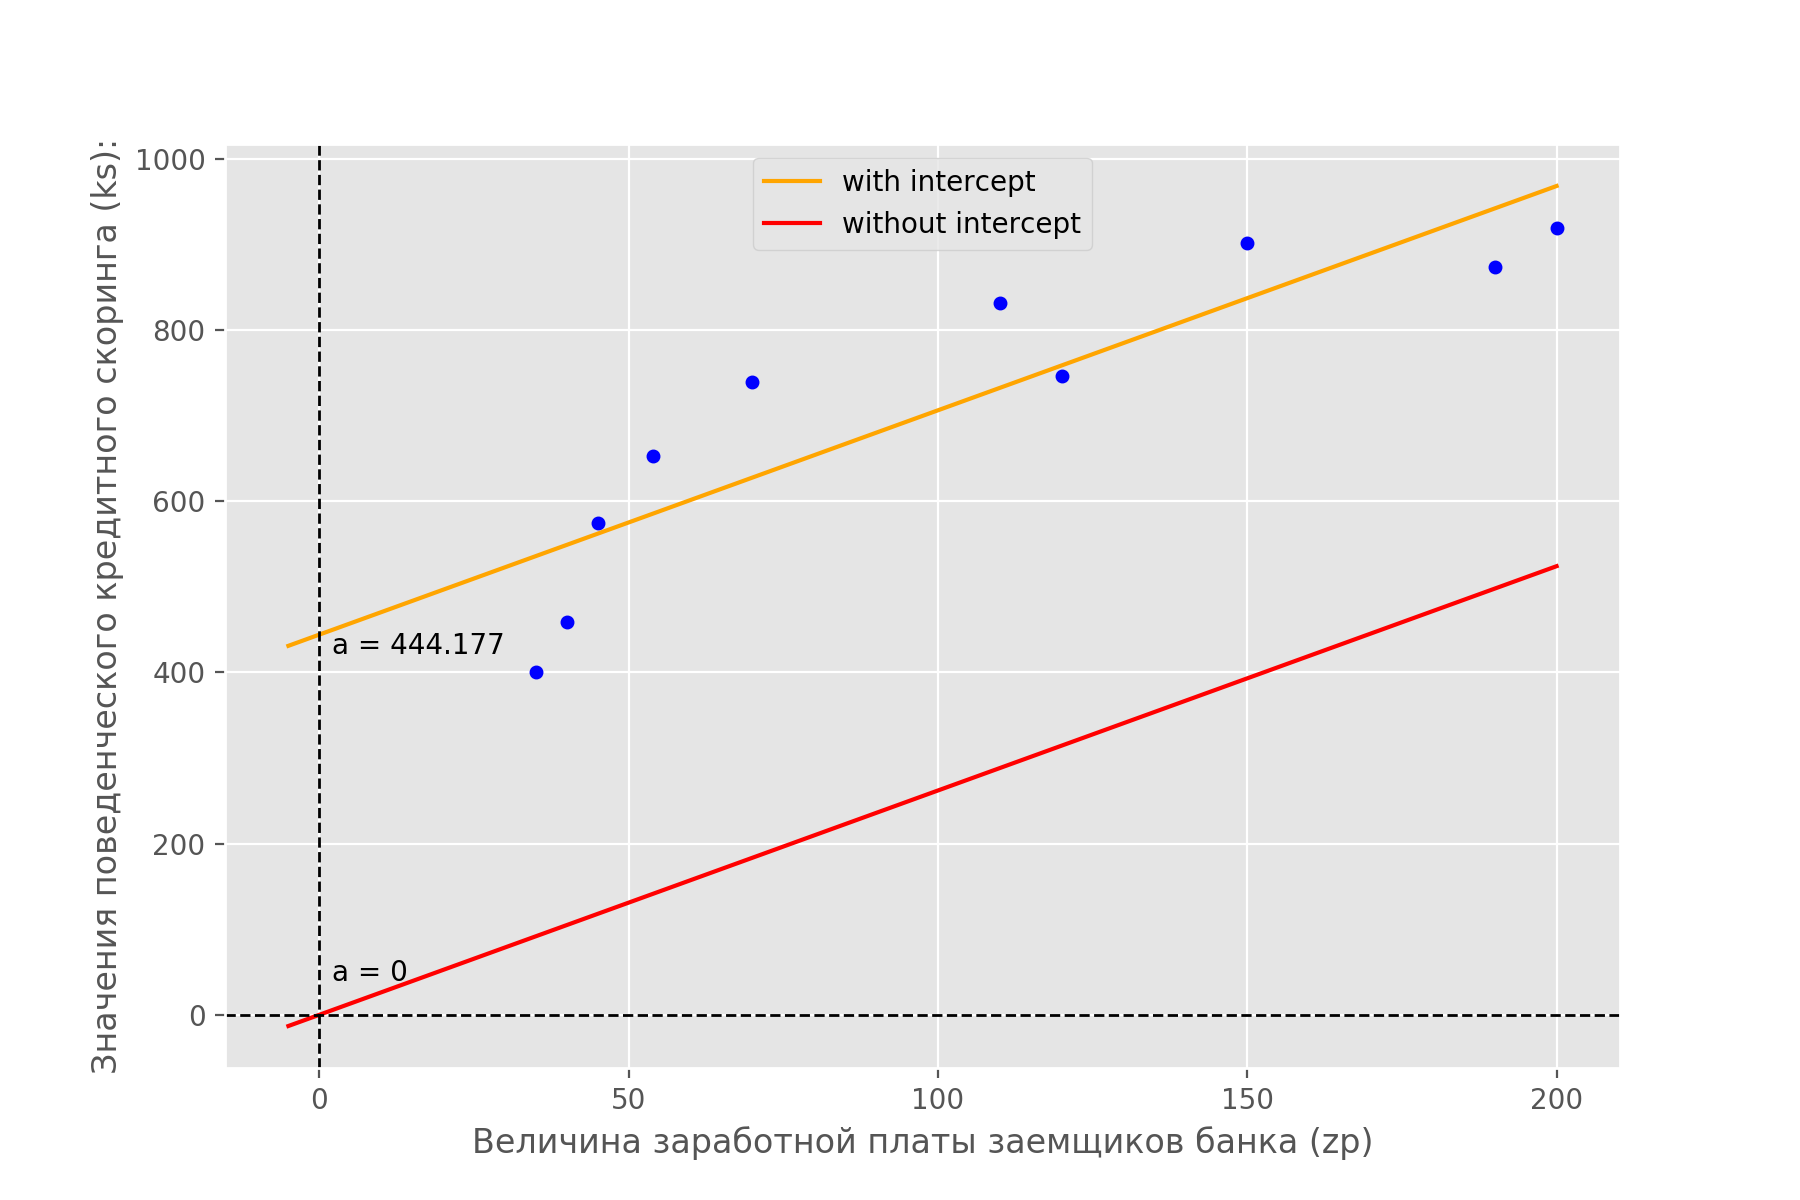

In [7]:
%matplotlib notebook

x_ = np.linspace(-5, x.max(), 10)

plt.close()
plt.plot(x, y, 'b.', markersize=8)
plt.plot(x_, a + b * x_, label='with intercept', color='orange')
plt.plot(x_, b * x_, label='without intercept', color='red')
plt.xlabel('Величина заработной платы заемщиков банка (zp)')
plt.ylabel('Значения поведенческого кредитного скоринга (ks):')

plt.axvline(0, color='k', linestyle='dashed', linewidth=1)
plt.axhline(0, color='k', linestyle='dashed', linewidth=1)

plt.text(2, a * 0.95, f'a = {np.round(a, decimals=3)}')
plt.text(2, 40, 'a = 0')

plt.legend();

**Ответ: $\hat{y} = 444.177 + 2.621 \cdot x$; $a = 444.177$ (intercept); $b = 2.621$**

### 2) Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [8]:
def mse_(B1, x=x, y=y, n=8):
    return np.sum((B1 * x - y)**2) / n

In [9]:
alpha = 1e-6

In [10]:
B1 = 0.1
for i in range(10):
    B1 -= alpha * (2 / n) * np.sum((B1 * x - y) * x)
    print(f'B1={B1}')

B1=0.25952808
B1=0.414660650906144
B1=0.5655188230595969
B1=0.7122203698240712
B1=0.8548798195302346
B1=0.9936085448867542
B1=1.1285148499277806
B1=1.2597040545647504
B1=1.387278576808517
B1=1.5113380127259965


In [11]:
B1 = 0.1
for i in range(100):
    B1 -= alpha * (2 / n) * np.sum((B1 * x - y) * x)
    if i % 10 == 0:
        print(f'Iteration: {i}, B1={B1}, mse={mse_(B1)}')

Iteration: 0, B1=0.25952808, mse=616547.1515683704
Iteration: 10, B1=1.6319792141937546, mse=382844.69600500434
Iteration: 20, B1=2.6698789606516935, mse=249191.20513968595
Iteration: 30, B1=3.4547782236263824, mse=172755.31328127827
Iteration: 40, B1=4.04834889855975, mse=129041.93530391157
Iteration: 50, B1=4.497229618367758, mse=104042.4309122854
Iteration: 60, B1=4.836690291080364, mse=89745.31527527071
Iteration: 70, B1=5.093403362579137, mse=81568.8525608085
Iteration: 80, B1=5.287539550879594, mse=76892.76654329686
Iteration: 90, B1=5.434352720103083, mse=74218.53182753247


In [12]:
B1 = 0.1
for i in range(2000):
    B1 -= alpha * (2 / n) * np.sum((B1 * x - y) * x)
    if i % 200 == 0:
        print(f'Iteration: {i}, B1={B1}, mse={mse_(B1)}')

Iteration: 0, B1=0.25952808, mse=616547.1515683704
Iteration: 200, B1=5.868748638669329, mse=70653.7193766172
Iteration: 400, B1=5.8897415574471985, mse=70646.07312675066
Iteration: 600, B1=5.889820124983314, mse=70646.07301965078
Iteration: 800, B1=5.88982041902807, mse=70646.07301964925
Iteration: 1000, B1=5.8898204201285544, mse=70646.07301964927
Iteration: 1200, B1=5.889820420132673, mse=70646.07301964928
Iteration: 1400, B1=5.889820420132673, mse=70646.07301964928
Iteration: 1600, B1=5.889820420132673, mse=70646.07301964928
Iteration: 1800, B1=5.889820420132673, mse=70646.07301964928


In [13]:
mse_(5.8898204201285544)

70646.07301964927

**Ответ: b = 5.89**

### 3) В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

**Ответ: Таблица значений функции Лапласа - z-критерий - когда известна дисперсия $\sigma$ генеральной совокупности; Таблица критических точек распределения Стьюдента - t-критерий - когда дисперсия $\sigma$ генеральной совокупности неизвестна.**

### *4) Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [14]:
def mse_(B0, B1, x=x, y=y, n=10):
    return np.sum((B0 + B1 * x - y)**2) / n

In [15]:
alpha0 = 1e-3
alpha1 = 1e-6
B0 = 3
B1 = 0.1
for i in range(2000):
    new_B0 = alpha0 * (2 / n) * np.sum(((B0 + B1 * x) - y))
    new_B1 = alpha1 * (2 / n) * np.sum(((B0 + B1 * x) - y) * x)
    if i % 200 == 0:
        print(f'Iteration: {i}, B0={B0}, B1={B1}, mse={mse_(B0, B1)}')
    B0 -= new_B0
    B1 -= new_B1

Iteration: 0, B0=3, B1=0.1, mse=514146.766
Iteration: 200, B0=80.87581876852539, B1=5.326093700404002, mse=39964.848495798295
Iteration: 400, B0=114.29512068702573, B1=5.0916527545777805, mse=34100.37779064049
Iteration: 600, B0=144.5475244931388, B1=4.865074647448589, mse=29265.087290916905
Iteration: 800, B0=172.0253269282477, B1=4.659237740962399, mse=25275.98084910438
Iteration: 1000, B0=196.98325399638446, B1=4.472277176048995, mse=21984.974798618634
Iteration: 1200, B0=219.65239371595825, B1=4.302461984111118, mse=19269.900387264155
Iteration: 1400, B0=240.24264122609682, B1=4.1482198348167705, mse=17029.9686016317
Iteration: 1600, B0=258.94464305648904, B1=4.008122589409397, mse=15182.028676558471
Iteration: 1800, B0=275.93156233911367, B1=3.880873077777665, mse=13657.481371777325


In [16]:
alpha0 = 1e-3
alpha1 = 1e-6
B0 = 3
B1 = 0.1
for i in range(100000):
    new_B0 = alpha0 * (2 / n) * np.sum(((B0 + B1 * x) - y))
    new_B1 = alpha1 * (2 / n) * np.sum(((B0 + B1 * x) - y) * x)
    if i % 10000 == 0:
        print(f'Iteration: {i}, B0={B0}, B1={B1}, mse={mse_(B0, B1)}')
    B0 -= new_B0
    B1 -= new_B1

Iteration: 0, B0=3, B1=0.1, mse=514146.766
Iteration: 10000, B0=440.91725024050993, B1=2.644960440390114, mse=6473.112729604577
Iteration: 20000, B0=444.1507771231568, B1=2.620737995471229, mse=6470.4143805590475
Iteration: 30000, B0=444.1771406115097, B1=2.620540505805094, mse=6470.414201188581
Iteration: 40000, B0=444.17735555746367, B1=2.6205388956386355, mse=6470.414201176661
Iteration: 50000, B0=444.17735730995366, B1=2.620538882510681, mse=6470.414201176657
Iteration: 60000, B0=444.17735732423216, B1=2.6205388824037117, mse=6470.414201176659
Iteration: 70000, B0=444.1773573243006, B1=2.6205388824032076, mse=6470.41420117666
Iteration: 80000, B0=444.1773573243006, B1=2.6205388824032076, mse=6470.41420117666
Iteration: 90000, B0=444.1773573243006, B1=2.6205388824032076, mse=6470.41420117666


In [17]:
mse_(444.17735732423216, 2.6205388824037117)

6470.414201176659

**Проверка с помощью модели LinearRegression из библиотеки sklearn:**

In [18]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y);

In [19]:
print(f'coef={model.coef_}, intercept={model.intercept_}')

coef=[[2.62053888]], intercept=[444.17735732]


In [20]:
y_pred = model.predict(x)
mean_squared_error(y_pred, y)

6470.414201176658